In [1]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/mean_representational_distance/distance_matrix_lda_zscored/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/lda_3/'
object_path =  os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/'

In [3]:
mouse_vector = [56165, 32363, 32364, 32365, 411857, 411857, 401714]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [0,1,0,2,2,6,2] # total = 6
sessions_overlapping = [1,2,1,0,3,5,0] # total = 6
fixed_corner = [3,4,1,0,2,4,0]
sessions_stable = [2,0,2,0,1,4,1] # total = 5 (4 and 1/2)


In [4]:
random = []
overlapping = []
stable = []

random_dv = []
overlapping_dv = []
stable_dv = []

random_d = []
overlapping_d = []
stable_d = []

fixed_corner_data = []
occupied_corners_random = []
occupied_corners_stable = []
occupied_corners_overlapping = []
empty_corners_random = []
empty_corners_stable = []
empty_corners_overlapping = []

occupied_corners_overlapping_id = []

for i in [0,1,2,3,4,5,6]:
    mouse = mouse_vector[i]
    #### check session_random
    session = sessions_random[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_1.npy'
        file_name2 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_2.npy'
        file_name1 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.daily_zscored.npy'
        if os.path.isfile(file_name):
            objects_position_file = object_path + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_random.append(np.load(objects_position_file))
            empty_corners_random.append(np.load(objects_position_file))

    session = sessions_overlapping[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_1.npy'
        file_name2 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_2.npy'
        file_name1 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.daily_zscored.npy'
        if os.path.isfile(file_name) and os.path.isfile(file_name1):
            fixed_corner_data.append(fixed_corner[i])
            objects_position_file = object_path + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_overlapping.append(np.load(objects_position_file))
            empty_corners_overlapping.append(np.load(objects_position_file))
            occupied_corners_overlapping_id.append(np.load(objects_position_file))
   
    session = sessions_stable[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_1.npy'
        file_name2 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_2.npy'
        file_name1 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.daily_zscored.npy'
        if os.path.isfile(file_name) and os.path.isfile(file_name1):
            objects_position_file = object_path + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            print(mouse)

            occupied_corners_stable.append(np.load(objects_position_file))
            empty_corners_stable.append(np.load(objects_position_file))

56165
411857
411857
401714


In [5]:
len(occupied_corners_stable)

4

In [6]:
corners = [1,2,3,4]
prob_random = []
for i in range(len(occupied_corners_random)):
    data = occupied_corners_random[i]
    probability = np.zeros((4,20))
    for trial in range(1,20):
        if len(np.where(data[:,trial])[0]):
            non_intersection = list(set(corners) ^ set(data[:,trial]))
            for j in range(2):
                obj = occupied_corners_random[i][j][trial]
                if obj > 0 :
                    count = (len(np.where(data[0][0:trial]==obj)[0])+len(np.where(data[1][0:trial]==obj)[0]))/(trial)
                    probability[j,trial] = count
                empty = non_intersection[j]
                if empty:
                    count = (len(np.where(data[0][0:trial]==empty)[0])+len(np.where(data[1][0:trial]==empty)[0]))/(trial)
                    probability[j+2,trial] = count
    prob_random.append(probability)
    
prob_overlapping= []
for i in range(len(occupied_corners_overlapping)):
    data = occupied_corners_overlapping[i]
    probability = np.zeros((4,20))
    for trial in range(1,20):
        if len(np.where(data[:,trial])[0]):
            non_intersection = list(set(corners) ^ set(data[:,trial]))
            for j in range(2):
                obj = occupied_corners_overlapping[i][j][trial]
                if obj>0:
                    count = (len(np.where(data[0][0:trial]==obj)[0])+len(np.where(data[1][0:trial]==obj)[0]))/(trial)
                    probability[j,trial] = count
                empty = non_intersection[j]
                if empty:
                    count = (len(np.where(data[0][0:trial]==empty)[0])+len(np.where(data[1][0:trial]==empty)[0]))/(trial)
                    probability[j+2,trial] = count
    prob_overlapping.append(probability)
    
    
prob_stable= []
for i in range(len(occupied_corners_stable)):
    data = occupied_corners_stable[i]
    probability = np.zeros((4,20))
    for trial in range(1,20):
        if len(np.where(data[:,trial])[0]):
            non_intersection = list(set(corners) ^ set(data[:,trial]))
            for j in range(2):
                    obj = occupied_corners_stable[i][j][trial]
                    if obj>0:
                        count = (len(np.where(data[0][0:trial]==obj)[0])+len(np.where(data[1][0:trial]==obj)[0]))/(trial)
                        probability[j,trial] = count
                    empty = non_intersection[j]
                    if empty:
                        count = (len(np.where(data[0][0:trial]==empty)[0])+len(np.where(data[1][0:trial]==empty)[0]))/(trial)
                        probability[j+2,trial] = count
    prob_stable.append(probability)       

In [7]:
len(occupied_corners_stable)

4

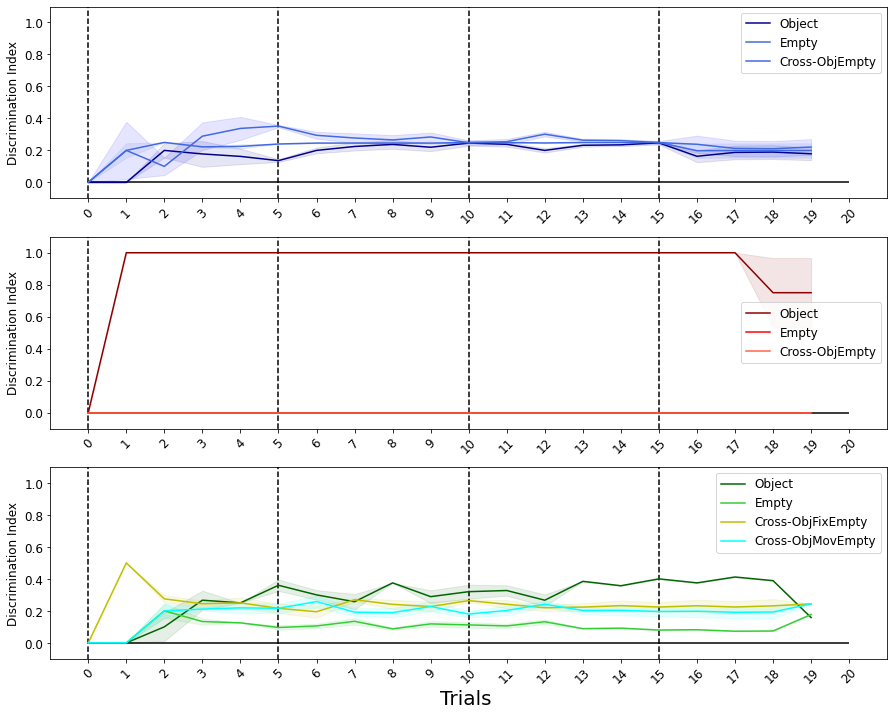

In [9]:
def probability_product_evolution(exploration_list,index1,index2, cross= False, over = False):
    evolution_list = []
    evolution_list1 = []
    evolution_list2 = []
    for i in range(len(exploration_list)):
        new_val = (exploration_list[i][index1,:]*exploration_list[i][index2,:])
        new_val1 = 0
        new_val2 = 0
        if cross == True:
            new_val = 0
            for j in range(2):
                new_val += (exploration_list[i][2,:]*exploration_list[i][j,:])
                new_val += (exploration_list[i][3,:]*exploration_list[i][j,:])
            new_val/=4
            if over == True:
                for j in range(2):
                    new_val1 += (exploration_list[i][2,:]*exploration_list[i][j,:])
                    new_val2 += (exploration_list[i][3,:]*exploration_list[i][j,:])
                new_val1/=2
                new_val2/=2
                
        evolution_list.append(new_val)
        evolution_list1.append(new_val1)
        evolution_list2.append(new_val2)
    if over == True:
        return evolution_list1,evolution_list2
        
    return evolution_list

    
DI_oo_random = probability_product_evolution(prob_random,0,1)
DI_ee_random = probability_product_evolution(prob_random,3,2)
DI_oe_random = probability_product_evolution(prob_random,0,1,cross=True)
    
DI_oo_stable = probability_product_evolution(prob_stable,0,1)
DI_ee_stable = probability_product_evolution(prob_stable,3,2)
DI_oe_stable = probability_product_evolution(prob_stable,3,2,cross=True)
    
DI_oo_overlapping = probability_product_evolution(prob_overlapping,0,1)
DI_ee_overlapping = probability_product_evolution(prob_overlapping,3,2)
[DI_oe_overlapping_fix, DI_oe_overlapping_MOV] = probability_product_evolution(prob_overlapping,3,2,cross=True,over=True)
    
o_exploration = []
o_exploration.append(DI_oo_overlapping)
o_exploration.append(DI_ee_overlapping)
o_exploration.append(DI_oe_overlapping_fix)
o_exploration.append(DI_oe_overlapping_MOV)

r_exploration = []
r_exploration.append(DI_oo_random)
r_exploration.append(DI_ee_random)
r_exploration.append(DI_oe_random)

s_exploration = []
s_exploration.append(DI_oo_stable)
s_exploration.append(DI_ee_stable)
s_exploration.append(DI_oe_stable)
    
data_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/lda_3/'
file_name = 'prob_product_overlapping.npy'
np.save(data_path + file_name, o_exploration)
file_name = 'prob_product__random.npy'
np.save(data_path + file_name, r_exploration)
file_name = 'prob_product__stable.npy'
np.save(data_path + file_name, s_exploration)    

random_mean_occ = np.nanmean(DI_oo_random, axis = 0)
random_sem_occ =  np.nanstd(DI_oo_random,axis = 0)/np.sqrt(len(DI_oo_random))
random_mean_emp = np.nanmean(DI_ee_random, axis = 0)
random_sem_emp =  np.nanstd(DI_ee_random,axis = 0)/np.sqrt(len(DI_ee_random))
random_mean_cross = np.nanmean(DI_oe_random, axis = 0)
random_sem_cross =  np.nanstd(DI_oe_random,axis = 0)/np.sqrt(len(DI_oe_random))

stable_mean_occ = np.nanmean(DI_oo_stable, axis = 0)
stable_sem_occ =  np.nanstd(DI_oo_stable,axis = 0)/np.sqrt(len(DI_oo_stable))
stable_mean_emp = np.nanmean(DI_ee_stable, axis = 0)
stable_sem_emp =  np.nanstd(DI_ee_stable,axis = 0)/np.sqrt(len(DI_ee_stable))
stable_mean_cross = np.nanmean(DI_oe_stable, axis = 0)
stable_sem_cross =  np.nanstd(DI_oe_stable,axis = 0)/np.sqrt(len(DI_oe_stable))

overlapping_mean_occ = np.nanmean(DI_oo_overlapping , axis = 0)
overlapping_sem_occ =  np.nanstd(DI_oo_overlapping ,axis = 0)/np.sqrt(len(DI_oo_overlapping ))
overlapping_mean_emp = np.nanmean(DI_ee_overlapping, axis = 0)
overlapping_sem_emp =  np.nanstd(DI_ee_overlapping,axis = 0)/np.sqrt(len(DI_ee_overlapping))
overlapping_mean_cross_fix = np.nanmean(DI_oe_overlapping_fix, axis = 0)
overlapping_sem_cross_fix =  np.nanstd(DI_oe_overlapping_fix,axis = 0)/np.sqrt(len(DI_oe_overlapping_fix))
overlapping_mean_cross_mov = np.nanmean(DI_oe_overlapping_MOV, axis = 0)
overlapping_sem_cross_mov =  np.nanstd(DI_oe_overlapping_MOV,axis = 0)/np.sqrt(len(DI_oe_overlapping_MOV))



figure, axes = plt.subplots(3,1)
 
titles = ['RANDOM','STABLE','OVERLAPPING']

time = np.arange(0,20)
axes[0].plot(time,random_mean_occ[time],'darkblue')
axes[1].plot(time,stable_mean_occ[time],'darkred')
axes[2].plot(time,overlapping_mean_occ[time],'darkgreen')
axes[0].fill_between(time,random_mean_occ[time]-random_sem_occ[time],random_mean_occ[time]+random_sem_occ[time],alpha = 0.1, edgecolor = 'darkblue', facecolor = 'darkblue')
axes[1].fill_between(time,stable_mean_occ[time]-stable_sem_occ[time],stable_mean_occ[time]+stable_sem_occ[time],alpha = 0.1, edgecolor = 'darkred', facecolor = 'darkred')
axes[2].fill_between(time,overlapping_mean_occ[time]-overlapping_sem_occ[time],overlapping_mean_occ[time]+overlapping_sem_occ[time],alpha = 0.1, edgecolor = 'darkgreen', facecolor = 'darkgreen')
        
axes[0].plot(time,random_mean_emp[time],'royalblue')
axes[1].plot(time,stable_mean_emp[time],'red')
axes[2].plot(time,overlapping_mean_emp[time],'limegreen')
axes[0].fill_between(time,random_mean_emp[time]-random_sem_emp[time],random_mean_emp[time]+random_sem_emp[time],alpha = 0.1, edgecolor = 'blue', facecolor = 'blue')
axes[1].fill_between(time,stable_mean_emp[time]-stable_sem_emp[time],stable_mean_emp[time]+stable_sem_emp[time],alpha = 0.1, edgecolor = 'red', facecolor = 'red')
axes[2].fill_between(time,overlapping_mean_emp[time]-overlapping_sem_emp[time],overlapping_mean_emp[time]+overlapping_sem_emp[time],alpha = 0.1, edgecolor = 'limegreen', facecolor = 'limegreen')
        

axes[0].plot(time,random_mean_cross[time],'royalblue')
axes[1].plot(time,stable_mean_cross[time],'tomato')
axes[2].plot(time,overlapping_mean_cross_fix[time],'y')
axes[2].plot(time,overlapping_mean_cross_mov[time],'cyan')
axes[0].fill_between(time,random_mean_cross[time]-random_sem_cross[time],random_mean_cross[time]+random_sem_cross[time],alpha = 0.1, edgecolor = 'royalblue', facecolor = 'royalblue')
axes[1].fill_between(time,stable_mean_cross[time]-stable_sem_cross[time],stable_mean_cross[time]+stable_sem_cross[time],alpha = 0.1, edgecolor = 'tomato', facecolor = 'tomato')
axes[2].fill_between(time,overlapping_mean_cross_fix[time]-overlapping_sem_cross_fix[time],overlapping_mean_cross_fix[time]+overlapping_sem_cross_fix[time],alpha = 0.1, edgecolor = 'y', facecolor = 'y')
axes[2].fill_between(time,overlapping_mean_cross_mov[time]-overlapping_sem_cross_mov[time],overlapping_mean_cross_mov[time]+overlapping_sem_cross_mov[time],alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')

    
for j in range(3):
    axes[j].set_ylim([-0.1,1.1])
    axes[j].set_ylabel('Discrimination Index',fontsize = 12)
    axes[j].tick_params(axis='x', labelsize=12)
    axes[j].set_xticks(np.arange(0,21))

    axes[j].tick_params(axis='y', labelsize=12)  
    for tick in axes[j].get_xticklabels():
        tick.set_rotation(45)
    axes[j].hlines(0,0,20,color = 'k')  
    if j < 2:
        axes[j].legend(['Object','Empty','Cross-ObjEmpty'], fontsize = 12)
    #axes[j].set_title(titles[j],fontsize = 20)
    axes[j].vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes[2].set_xlabel('Trials ',fontsize = 20)
axes[2].legend(['Object','Empty','Cross-ObjFixEmpty','Cross-ObjMovEmpty'], fontsize = 12)

figure.set_size_inches([15,12])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'prob_prod_all.png')


In [10]:
overlapping_list = []
random_list = []
stable_list = []

for j in range(4):

    overlapping_matrix = np.zeros((len(prob_overlapping),20))
    random_matrix = np.zeros((len(prob_random),20))
    stable_matrix = np.zeros((len(prob_stable),20))
    for i in range(len(prob_overlapping)):
        overlapping_matrix[i,:] = np.cumsum(prob_overlapping[i][j,:])/np.sum(prob_overlapping[i][j,:])
    for i in range(len(prob_random)):
        random_matrix[i,:] = np.cumsum(prob_random[i][j,:])/np.sum(prob_random[i][j,:])
    for i in range(len(prob_stable)):
        stable_matrix[i,:] = np.cumsum(prob_stable[i][j,:])/np.sum(prob_stable[i][j,:])

    overlapping_list.append(overlapping_matrix)
    stable_list.append(stable_matrix)
    random_list.append(random_matrix)
    
data_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/lda_3/'
file_name = 'cumulative_prob_overlapping.npy'
np.save(data_path + file_name, overlapping_list)
file_name = 'cumulative_prob_random.npy'
np.save(data_path + file_name, random_list)
file_name = 'cumulative_prob_stable.npy'
np.save(data_path + file_name, stable_list)

In [41]:
# overlapping_list = []
# random_list = []
# stable_list = []
# for i in range(len(prob_overlapping)):
#     overlapping_matrix = np.zeros((4,20))
#     for j in range(4):
#         overlapping_matrix[j,:] = np.cumsum(prob_overlapping[i][j,:])/np.sum(prob_overlapping[i][j,:])
#     overlapping_list.append(overlapping_matrix)

# for i in range(len(prob_random)):
#     random_matrix = np.zeros((4,20))
#     for j in range(4):
#         random_matrix[j,:] = np.cumsum(prob_random[i][j,:])/np.sum(prob_random[i][j,:])
#     random_list.append(random_matrix)

# for i in range(len(prob_stable)):
#     stable_matrix = np.zeros((4,20))
#     for j in range(4):
#         stable_matrix[j,:] = np.cumsum(prob_stable[i][j,:])/np.sum(prob_stable[i][j,:])
#     stable_list.append(stable_matrix)
# prob_random = random_list
# prob_overlapping = overlapping_list
# prob_stable = stable_list

In [8]:
prob_trial_random = []
prob_day_random = []

for j in range(4):
    exp_mat_trial = np.zeros((len(prob_random)*4,5))
    exp_mat_day = np.zeros((4,5*len(prob_random)))
    for i in range(len(prob_random)):
        data = prob_random[i][j,:]
        data_reshape = data.reshape(4,5)
        exp_mat_trial[i*4:(i+1)*4,:] = data_reshape
        exp_mat_day[:,i*5:(i+1)*5] = data_reshape
    prob_trial_random.append(exp_mat_trial)
    prob_day_random.append(exp_mat_day)
                
prob_trial_overlapping= []
prob_day_overlapping = []

for j in range(4):
    exp_mat_trial = np.zeros((len(prob_overlapping)*4,5))
    exp_mat_day = np.zeros((4,5*len(prob_overlapping)))
    for i in range(len(prob_overlapping)):
        data = prob_overlapping[i][j,:]
        data_reshape = data.reshape(4,5)
        exp_mat_trial[i*4:(i+1)*4,:] = data_reshape
        exp_mat_day[:,i*5:(i+1)*5] = data_reshape
    prob_trial_overlapping.append(exp_mat_trial)
    prob_day_overlapping.append(exp_mat_day)   
    
prob_trial_stable= []
prob_day_stable= []
for j in range(4):
    exp_mat_trial = np.zeros((len(prob_stable)*4,5))
    exp_mat_day = np.zeros((4,5*len(prob_stable)))
    for i in range(len(prob_stable)):
        data = prob_stable[i][j,:]
        data_reshape = data.reshape(4,5)
        exp_mat_trial[i*4:(i+1)*4,:] = data_reshape
        exp_mat_day[:,i*5:(i+1)*5] = data_reshape
    prob_trial_stable.append(exp_mat_trial)
    prob_day_stable.append(exp_mat_day)  

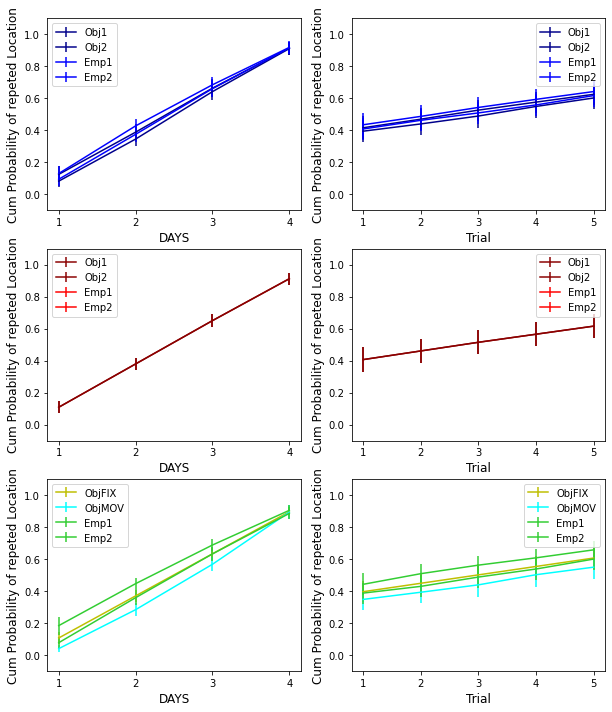

In [13]:
figure, axes = plt.subplots(3,2)
color_random = ['darkblue','darkblue','blue','blue']
color_stable = ['darkred','darkred','red','red']
color_overlapping = ['y','cyan','limegreen','limegreen']

trials = np.arange(0,5)
for i in range(4):
    axes[0,1].errorbar(trials,np.nanmean(prob_trial_random[i],axis = 0),np.nanstd(prob_trial_random[i],axis = 0)/np.sqrt(prob_trial_random[i].shape[0]),color = color_random[i])
    axes[1,1].errorbar(trials,np.nanmean(prob_trial_stable[i],axis = 0),np.nanstd(prob_trial_stable[i],axis = 0)/np.sqrt(prob_trial_stable[i].shape[0]),color = color_stable[i])
    axes[2,1].errorbar(trials,np.nanmean(prob_trial_overlapping[i],axis = 0),np.nanstd(prob_trial_overlapping[i],axis = 0)/np.sqrt(prob_trial_overlapping[i].shape[0]), color = color_overlapping[i])
 
days = np.arange(0,4)
for i in range(4):
    axes[0,0].errorbar(days,np.nanmean(prob_day_random[i],axis = 1),np.nanstd(prob_day_random[i],axis = 1)/np.sqrt(prob_day_random[i].shape[0]),color = color_random[i])
    axes[1,0].errorbar(days,np.nanmean(prob_day_stable[i],axis= 1),np.nanstd(prob_day_stable[i],axis = 1)/np.sqrt(prob_day_stable[i].shape[0]),color = color_stable[i])
    axes[2,0].errorbar(days,np.nanmean(prob_day_overlapping[i],axis = 1),np.nanstd(prob_day_overlapping[i],axis = 1)/np.sqrt(prob_day_overlapping[i].shape[0]),color = color_overlapping[i])

for i in range(2):
    for j in range(3):
        axes[j,i].set_ylim([-0.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

titles = ['RANDOM','STABLE','OVERLAPPING']
for j in range(3):
    axes[j,1].set_xticks(trials_comparison_pos)
    axes[j,1].set_xlabel('Trial', fontsize = 12)
    axes[j,1].set_ylabel('Cum Probability of repeted Location', fontsize = 12)
    #axes[j,1].set_title(titles[j],fontsize = 15)
    axes[j,1].set_xticklabels(tick_label)

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
for j in range(3):
    axes[j,0].set_xticks(trials_comparison_pos)
    axes[j,0].set_xlabel('DAYS', fontsize = 12)
    axes[j,0].set_ylabel('Cum Probability of repeted Location', fontsize = 12)
    axes[j,0].set_xticklabels(tick_label)

for i in range(2):
    axes[0,i].legend(['Obj1','Obj2','Emp1','Emp2'])
    axes[1,i].legend(['Obj1','Obj2','Emp1','Emp2'])
    axes[2,i].legend(['ObjFIX','ObjMOV','Emp1','Emp2'])

figure.set_size_inches([10,12])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'cum_probability_occupation.png')

In [10]:
random_mean_occ = np.mean(prob_random, axis = 0)
random_sem_occ =  np.std(prob_random,axis = 0)/np.sqrt(len(prob_random))

stable_mean_occ = np.mean(prob_stable, axis = 0)
stable_sem_occ =  np.std(prob_stable,axis = 0)/np.sqrt(len(stable))

overlapping_mean_occ = np.mean(prob_overlapping, axis = 0)
overlapping_sem_occ =  np.std(prob_overlapping,axis = 0)/np.sqrt(len(prob_overlapping))

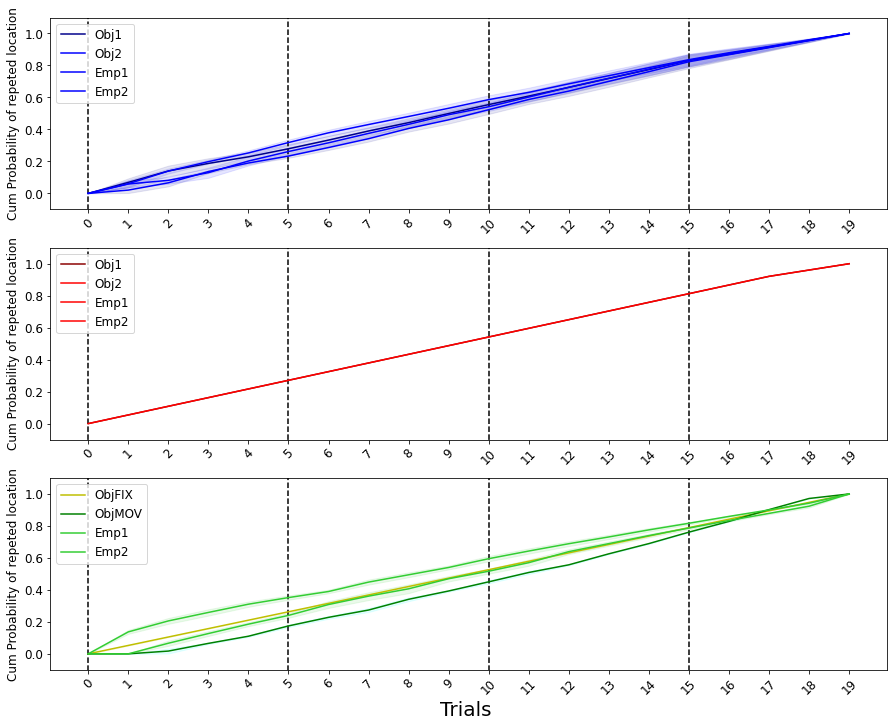

In [12]:
figure, axes = plt.subplots(3,1)
 
titles = ['RANDOM','STABLE','OVERLAPPING']

time = np.arange(0,20)
axes[0].plot(time,random_mean_occ[0,time],'darkblue')
axes[1].plot(time,stable_mean_occ[0,time],'darkred')
axes[2].plot(time,overlapping_mean_occ[0,time],'y')
axes[0].fill_between(time,random_mean_occ[0,time]-random_sem_occ[0,time],random_mean_occ[0,time]+random_sem_occ[0,time],alpha = 0.1, edgecolor = 'darkblue', facecolor = 'darkblue')
axes[1].fill_between(time,stable_mean_occ[0,time]-stable_sem_occ[0,time],stable_mean_occ[0,time]+stable_sem_occ[0,time],alpha = 0.1, edgecolor = 'darkred', facecolor = 'darkred')
axes[2].fill_between(time,overlapping_mean_occ[0,time]-overlapping_sem_occ[0,time],overlapping_mean_occ[0,time]+overlapping_sem_occ[0,time],alpha = 0.1, edgecolor = 'y', facecolor = 'y')
  
axes[0].plot(time,random_mean_occ[1,time],'blue')
axes[1].plot(time,stable_mean_occ[1,time],'red')
axes[2].plot(time,overlapping_mean_occ[1,time],'green')
axes[0].fill_between(time,random_mean_occ[1,time]-random_sem_occ[1,time],random_mean_occ[1,time]+random_sem_occ[1,time],alpha = 0.1, edgecolor = 'darkblue', facecolor = 'darkblue')
axes[1].fill_between(time,stable_mean_occ[1,time]-stable_sem_occ[1,time],stable_mean_occ[1,time]+stable_sem_occ[1,time],alpha = 0.1, edgecolor = 'darkred', facecolor = 'darkred')
axes[2].fill_between(time,overlapping_mean_occ[1,time]-overlapping_sem_occ[1,time],overlapping_mean_occ[1,time]+overlapping_sem_occ[1,time],alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')

axes[0].plot(time,random_mean_occ[2,time],'blue')
axes[1].plot(time,stable_mean_occ[2,time],'red')
axes[2].plot(time,overlapping_mean_occ[2,time],'limegreen')
axes[0].fill_between(time,random_mean_occ[2,time]-random_sem_occ[2,time],random_mean_occ[2,time]+random_sem_occ[2,time],alpha = 0.1, edgecolor = 'blue', facecolor = 'blue')
axes[1].fill_between(time,stable_mean_occ[2,time]-stable_sem_occ[2,time],stable_mean_occ[2,time]+stable_sem_occ[2,time],alpha = 0.1, edgecolor = 'red', facecolor = 'red')
axes[2].fill_between(time,overlapping_mean_occ[2,time]-overlapping_sem_occ[2,time],overlapping_mean_occ[2,time]+overlapping_sem_occ[2,time],alpha = 0.1, edgecolor = 'limegreen', facecolor = 'limegreen')


axes[0].plot(time,random_mean_occ[3,time],'blue')
axes[1].plot(time,stable_mean_occ[3,time],'red')
axes[2].plot(time,overlapping_mean_occ[3,time],'limegreen')
axes[0].fill_between(time,random_mean_occ[3,time]-random_sem_occ[3,time],random_mean_occ[3,time]+random_sem_occ[3,time],alpha = 0.1, edgecolor = 'blue', facecolor = 'blue')
axes[1].fill_between(time,stable_mean_occ[3,time]-stable_sem_occ[3,time],stable_mean_occ[3,time]+stable_sem_occ[3,time],alpha = 0.1, edgecolor = 'red', facecolor = 'red')
axes[2].fill_between(time,overlapping_mean_occ[3,time]-overlapping_sem_occ[3,time],overlapping_mean_occ[3,time]+overlapping_sem_occ[3,time],alpha = 0.1, edgecolor = 'limegreen', facecolor = 'limegreen')
  
      
for j in range(3):
    axes[j].set_ylim([-0.1,1.1])
    axes[j].set_ylabel('Cum Probability of repeted location',fontsize = 12)
    axes[j].tick_params(axis='x', labelsize=12)
    axes[j].set_xticks(np.arange(0,21))

    axes[j].tick_params(axis='y', labelsize=12)  
    for tick in axes[j].get_xticklabels():
        tick.set_rotation(45)
    #axes[j].hlines(0,0,20,color = 'k')  
    if j < 2:
        axes[j].legend(['Obj1','Obj2','Emp1','Emp2'], fontsize = 12)
    #axes[j].set_title(titles[j],fontsize = 20)
    axes[j].vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes[2].set_xlabel('Trials ',fontsize = 20)
axes[2].legend(['ObjFIX','ObjMOV','Emp1','Emp2'], fontsize = 12)

figure.set_size_inches([15,12])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'cum_probability_occupation_evolution.png')